# Sampling Distirbutions with the NHANES Dataset

This notebook shows how to create sampling dirstibutions with the NHANES dataset. However, note that sampling distributions are not usually created -- they are rather a theoretical concept. Additionally, the effect of changing the sample size is evaluated: variance decreases with larger sample sizes.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [44]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [45]:
# We extract 2x1000 subsamples from the NHANES dataset pairwise
# each subsample has 100 units/measurements.
# Pair means are compared.
# The distribution of the differences refers to the error we could have expected
# if two different researchers would have worked with only 100 participants
# correctly selected (probability sampling)

def compute_subsampling_differences(m):
    # Array subsample mean differences
    sbp_diff = []
    for i in range(1000):
        # Two subsamples of size m
        # we get them together so that they are disjoint!
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        # Difference of mean BPXSY1 values
        sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    return sbp_diff

In [46]:
# Subsample size
m = 100

In [47]:
sbp_diff = compute_subsampling_differences(m=100)

<AxesSubplot:ylabel='Count'>

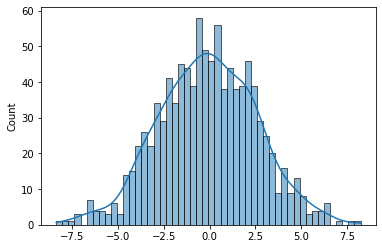

In [48]:
sns.histplot(sbp_diff, kde=True, bins=50)

In [49]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.099291
std         2.643081
min        -8.357201
25%        -1.920035
50%        -0.123016
75%         1.749806
max         8.226370
dtype: float64

In [50]:
# 95% CI: standard error with 95% coverage
np.std(sbp_diff)*2

5.283517891223856

2.6775137634692148


count    1000.000000
mean       -0.011996
std         1.339427
min        -4.739852
25%        -0.845870
50%        -0.045434
75%         0.839429
max         4.314667
dtype: float64

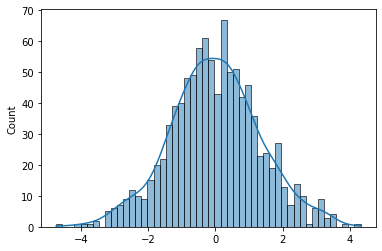

In [51]:
# Sample size is increased from 100 to 400
# Error is expected to decrease!
m = 400
sbp_diff = compute_subsampling_differences(m=400)
sns.histplot(sbp_diff, kde=True, bins=50)
print(np.std(sbp_diff)*2)
pd.Series(sbp_diff).describe()

In [52]:
# We can repeat that in a loop for different sampling sizes
sample_sizes = np.arange(1,500)
stds = []
for m in sample_sizes:
    sbp_diff = compute_subsampling_differences(m=m)
    stds.append(np.std(sbp_diff))

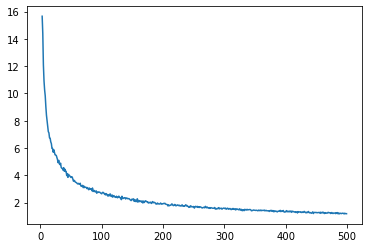

In [56]:
# In general, we observe a quadratic/square-root relaton ship
# An increase in K of the sample size leads to a decrease if the std dev in sqrt(K)
plt.plot(sample_sizes,stds)

In [58]:
# The same can be done not only with means, but with any other estimations
# such as the (Pearson) correlation between twi variables.
# When we 4x the sample size, the std dev correlation coeff decreases 2x (i.e., /2)
# The model for the std dev of teh correlation is sqrt(2/m)
for m in 100, 400:
    sbp_diff = []
    for i in range(1000):
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))    

m=100 0.12852709596817866 0.1414213562373095
m=400 0.06260714892721032 0.07071067811865475


<AxesSubplot:xlabel='BPXSY1', ylabel='Count'>

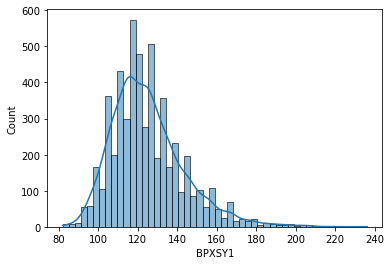

In [60]:
# According to the Central Limit Theorem,
# the sampling distributions should tend to become normal
# even if the original measurement distribution is not
sns.histplot(da.BPXSY1.dropna(), kde=True, bins=50)

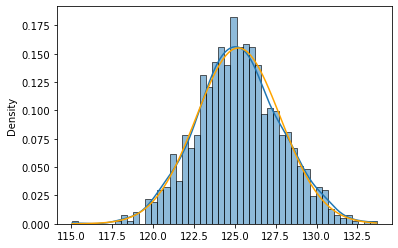

In [69]:
# We compute 1000 sample means from samples with 50 measurements each
# Plot the sampling distribution of the means
# And the normal distribution with its mean & std dev
m = 50
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.histplot(sbp_mean, kde=True, bins=50, stat='density')
# Normal model is very similar to the distribution
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')